In [139]:
from facebook_scraper import get_posts
import time
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
from cleantext import clean

In [52]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gautam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

# Scrapping Data

In [229]:
get_scraped1 = get_posts('cocacolaindia', pages=5, timeout=30, options = {"comments": True, "reactors": True, 
                                                              "posts_per_page": 50, "allow_extra_requests": False})

posts_scraped1 = []
for post in get_scraped1:
    posts_scraped1.append(post)

In [179]:
get_scraped2 = get_posts('PepsiIndia', pages=5, timeout=30, options = {"comments": True, "reactors": True,
                                                                    "posts_per_page": 50, "allow_extra_requests": False})

posts_scraped2 = []
for post in get_scraped2:
    posts_scraped2.append(post)
    time.sleep(1)

In [181]:
get_scraped3 = get_posts('spritein', pages=5, timeout=30, options = {"comments": True, "reactors": True, 
                                                                    "posts_per_page": 50, "allow_extra_requests": False})

posts_scraped3 = []
for post in get_scraped3:
    posts_scraped3.append(post)
    time.sleep(1)

## Converting Scrapped Data to DataFrame for Analysis

In [231]:
data1 = pd.DataFrame(posts_scraped1, columns=posts_scraped1[1].keys())

data2 = pd.DataFrame(posts_scraped2, columns=posts_scraped2[1].keys())

data3 = pd.DataFrame(posts_scraped3, columns=posts_scraped3[1].keys())

In [247]:
# Saving the data as CSV
data1.to_csv('CocaCola.csv',index=False)
data2.to_csv('Pepsi.csv',index=False)
data3.to_csv('Sprite.csv',index=False)

# The below code can be used to load the scrapped data by putting the proper file location
#data1= pd.read_csv('CocaCola.csv')
#data2= pd.read_csv('Pepsi.csv')
#data3= pd.read_csv('Sprite.csv')

## Function for cleaning text (without POS tagging)

In [351]:
wnl = WordNetLemmatizer()
def clean_text(x):
    comment_text = x.lower()
    comment_text = clean(comment_text)
    comment_text = re.sub(r'[^a-zA-Z ]+', '',comment_text)
    comment_text = word_tokenize(comment_text)
    comment_text = [w for w in comment_text if w not in stopwords.words('english')]
    comment_text = ' '.join([wnl.lemmatize(words) for words in comment_text])
    return comment_text

# Analysis

## Coca-Cola

In [280]:
# Scrapped Data
data1.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url
0,3812150062173433,"Together, we can make a difference. #StopTheSp...","Together, we can make a difference. #StopTheSp...",,2021-04-29 12:49:54,None,https://scontent.fbom19-1.fna.fbcdn.net/v/t1.6...,None,None,[https://scontent.fbom19-1.fna.fbcdn.net/v/t1....,...,None,None,None,None,None,None,True,"[{'comment_id': '3812209055500867', 'commenter...",None,None
1,3782273445161095,Break-time matlab Coca-Cola time. Chilled sip ...,Break-time matlab Coca-Cola time. Chilled sip ...,,2021-04-18 21:13:51,None,None,None,None,[],...,None,None,None,None,None,None,True,None,None,None
2,3782079238513849,"Aisi partnership pe dil bola, Coca-Cola. Burrr...","Aisi partnership pe dil bola, Coca-Cola. Burrr...",,2021-04-18 19:54:08,None,None,None,None,[],...,None,None,None,None,None,None,True,None,None,None
3,3781875141867592,The Shers are coming! Coca-Cola lao aur ready ...,The Shers are coming! Coca-Cola lao aur ready ...,,2021-04-18 18:20:47,None,None,None,None,[],...,None,None,None,None,None,None,True,None,None,None
4,3776589515729488,Jab game hai lit to break time ka josh bhi ho ...,Jab game hai lit to break time ka josh bhi ho ...,,2021-04-16 20:58:58,None,None,None,None,[],...,None,None,None,None,None,None,True,None,None,None


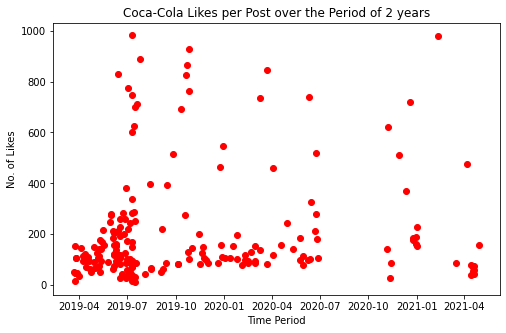

In [371]:
plt.figure(figsize=(8,5))
plt.scatter(data1.time,data1.likes, color='red',)
plt.title('Coca-Cola Likes per Post over the Period of 2 years')
plt.xlabel('Time Period')
plt.ylabel('No. of Likes')
plt.show()

In [237]:
# Extracting the comments from each post
coke = data1.comments_full.tolist()
coke = list(filter(None, coke))

coke_tmp = []
for i in range(len(coke)):
    for j in range(len(coke[i])):
        coke_tmp.append(coke[i][j])

In [243]:
# Putting the extracted comments into a DataFrame
cocacola_commentors = pd.DataFrame(coke_tmp, columns=coke_tmp[0].keys())

In [245]:
# Using the cleaning function and Vader to find Sentiments for each comment
sia = SentimentIntensityAnalyzer()
cocacola_commentors['cleaned_comments'] = cocacola_commentors['comment_text'].apply(lambda x: clean_text(x))
cocacola_commentors['Positive'] = cocacola_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['pos']) 
cocacola_commentors['Negative'] = cocacola_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neg'])
cocacola_commentors['Neutral'] = cocacola_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neu'])
cocacola_commentors['Compound'] = cocacola_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [303]:
# Dropping columns that are null
cocacola_commentors = cocacola_commentors.drop(['commenter_url', 'commenter_meta'], axis=1)
cocacola_commentors

,comment_id,commenter_name,comment_text,comment_time,cleaned_comments,Positive,Negative,Neutral,Compound
0,3812209055500867,Deepa Dhan,"Such a great initiative ,let's together stop t...",NaT,great initiative let together stop spread,0.398,0.214,0.388,0.4404
1,3812205885501184,Reena Jain,This was much needed initiative.. Kudos to you...,NaT,much needed initiative kudos team putting grea...,0.552,0.000,0.448,0.8126
2,3863686467019792,Gagandeep Singh,saw this pic while doing research on the 36th ...,2021-05-16 00:00:00.000000,saw pic research th id honestly coke never loo...,0.185,0.260,0.555,-0.0567
3,3812281065493666,Priya Shah,Let's join hands for this wow initiative,NaT,let join hand wow initiative,0.821,0.000,0.179,0.8481
4,3812209015500871,Pintu Sadhukhan,kudos dear team for such great initiative #sto...,NaT,kudos dear team great initiative stopthespread,0.769,0.000,0.231,0.8750
...,...,...,...,...,...,...,...,...,...
1069,2538900249498427,Amarendra Bhattacharjee,Merry Christmas to u & all of ur family member...,2020-05-19 00:37:51.288652,merry christmas u ur family member,0.467,0.000,0.533,0.5423
1070,2539394286115690,Samir Kumar Chatterjee,Merry Christmas &new year in advance.Thanks to...,2020-05-19 00:37:51.291577,merry christmas new year advancethanks,0.467,0.000,0.533,0.5423
1071,2538065409581911,Batish Mohanta,Batish Mohanta,2020-05-19 00:37:51.296478,batish mohanta,0.000,0.000,1.000,0.0000
1072,2539211749467277,Gracy Abraham,Merry. Christmas and. Happy. New. Year. Winnie...,2020-05-19 00:37:51.301303,merry christmas happy new year winnie family,0.590,0.000,0.410,0.8020


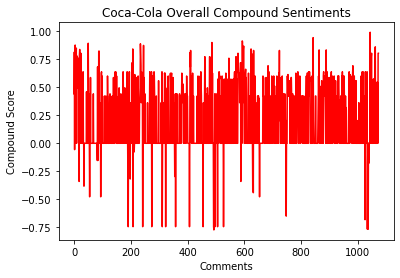

In [353]:
plt.plot(cocacola_commentors.Compound, color='red')
plt.title('Coca-Cola Overall Compound Sentiments')
plt.xlabel('Comments')
plt.ylabel('Compound Score')
plt.show()

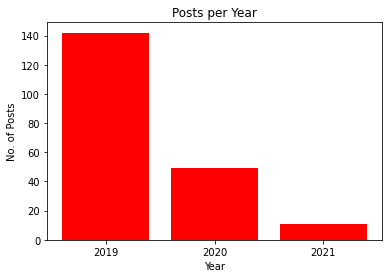

In [370]:
cocacola_post_year = []
for i in data1.time.tolist():
    cocacola_post_year.append(i.year)

cocacola_year = {}
for i in np.unique(cocacola_post_year):
    cocacola_year[i] = cocacola_post_year.count(i)

plt.bar(list(cocacola_year.keys()), cocacola_year.values(), color='red')
plt.xticks(np.arange(min(cocacola_year.keys()),max(cocacola_year.keys())+1,1))
plt.title('Posts per Year')
plt.xlabel('Year')
plt.ylabel('No. of Posts')
plt.show()

## Pepsi

In [379]:
# Scrapped Data
data2.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url
0,10158584526607362,Celebrate this festival of happiness at home w...,Celebrate this festival of happiness at home w...,,2021-05-14 09:30:01,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
1,10158580332867362,Celebrating the indomitable swag and the spiri...,Celebrating the indomitable swag and the spiri...,,2021-05-12 10:58:54,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
2,10158573447422362,Quick reminder to go give a hug to your Swagst...,Quick reminder to go give a hug to your Swagst...,,2021-05-09 13:28:36,None,https://scontent.fbom19-2.fna.fbcdn.net/v/t1.6...,None,None,[https://scontent.fbom19-2.fna.fbcdn.net/v/t1....,...,None,None,NaT,None,None,None,True,"[{'comment_id': '10158573522512362', 'commente...",None,None
3,10158572092797362,Saluting the swag of young India! #GivingTough...,Saluting the swag of young India! #GivingTough...,,2021-05-08 23:09:18,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
4,10158545293477362,"Till then, Swag on. Stay home.","Till then, Swag on. Stay home.",,2021-04-26 19:37:42,None,https://scontent.fbom19-2.fna.fbcdn.net/v/t1.6...,None,None,[https://scontent.fbom19-2.fna.fbcdn.net/v/t1....,...,None,None,NaT,None,None,None,True,"[{'comment_id': '10158553046137362', 'commente...",None,None


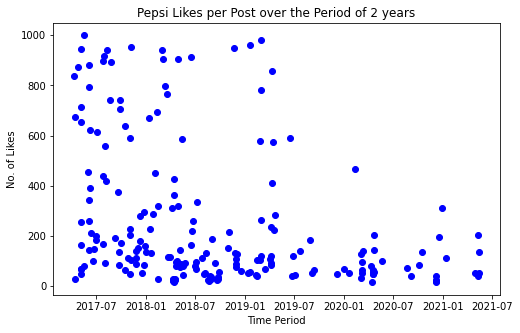

In [372]:
plt.figure(figsize=(8,5))
plt.scatter(data2.time,data2.likes, color='blue')
plt.title('Pepsi Likes per Post over the Period of 2 years')
plt.xlabel('Time Period')
plt.ylabel('No. of Likes')
plt.show()

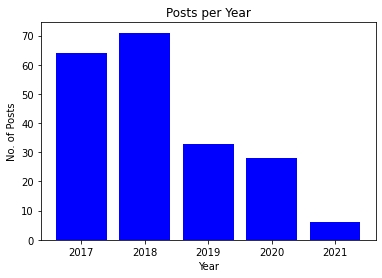

In [374]:
pepsi_post_year = []
for i in data2.time.tolist():
    pepsi_post_year.append(i.year)

pepsi_year = {}
for i in np.unique(pepsi_post_year):
    pepsi_year[i] = pepsi_post_year.count(i)

plt.bar(pepsi_year.keys(), pepsi_year.values(), color='blue')
plt.title('Posts per Year')
plt.xlabel('Year')
plt.ylabel('No. of Posts')
plt.show()

In [203]:
# Extracting the comments from each post
pepsi = data2.comments_full.tolist()
pepsi = list(filter(None, pepsi))

pepsi_tmp = []
for i in range(len(pepsi)):
    for j in range(len(pepsi[i])):
        pepsi_tmp.append(pepsi[i][j])

In [217]:
# Putting the extracted comments into a DataFrame
pepsi_commentors = pd.DataFrame(pepsi_tmp, columns=pepsi_tmp[0].keys())

In [221]:
# Using the cleaning function and Vader to find Sentiments for each comment
sia = SentimentIntensityAnalyzer()
pepsi_commentors['cleaned_comments'] = pepsi_commentors['comment_text'].apply(lambda x: clean_text(x))
pepsi_commentors['Positive'] = pepsi_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['pos']) 
pepsi_commentors['Negative'] = pepsi_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neg'])
pepsi_commentors['Neutral'] = pepsi_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neu'])
pepsi_commentors['Compound'] = pepsi_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [302]:
pepsi_commentors = pepsi_commentors.drop(['commenter_url', 'commenter_meta'], axis=1)
pepsi_commentors

,comment_id,commenter_name,comment_text,comment_time,cleaned_comments,Positive,Negative,Neutral,Compound
0,10158573522512362,Abin AG,Happy Mother's Day letters are too small,2021-05-11 23:15:48.091040,happy mother day letter small,0.481,0.000,0.519,0.5719
1,10158573848117362,Jesha Shah,https://\nyoutu.be/\n74kzZrF_9kc\n\nAn honest-...,2021-05-11 23:15:48.096863,httpsyoutubekzzrfkcan honesttogod miracle poem...,0.417,0.181,0.402,0.5719
2,10158573522607362,Abin AG,#happymothersday,2021-05-11 23:15:48.099855,happymothersday,0.000,0.000,1.000,0.0000
3,10158553046137362,राहुल हिन्दू,जहर बेचना बंद कर mc.,NaT,mc,0.000,0.000,1.000,0.0000
4,10158564105957362,Rahul Rajan Mcx,"inviting you to join Rupee4Click, a site that ...",NaT,inviting join rupeeclick site let earn money s...,0.273,0.000,0.727,0.5423
...,...,...,...,...,...,...,...,...,...
3237,10154554632182362,Subhra De Mitra,😍👌👌👌,NaT,,0.000,0.000,0.000,0.0000
3238,10154552344792362,Venkat Haridas,Add is awesome 😂,NaT,add awesome,0.804,0.000,0.196,0.6249
3239,10154548187077362,Abhijeet Gupta,Overpriced. I got a call from feedback departm...,NaT,overpriced got call feedback department saying...,0.000,0.000,1.000,0.0000
3240,10154548279502362,Rahul D Hake,nic looking Pepsi,NaT,nic looking pepsi,0.000,0.000,1.000,0.0000


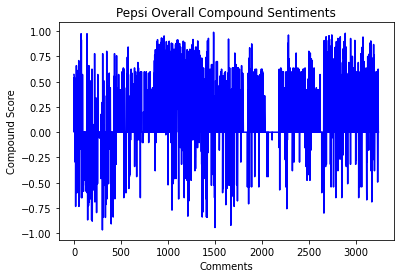

In [377]:
plt.plot(pepsi_commentors.Compound, color='blue')
plt.title('Pepsi Overall Compound Sentiments')
plt.xlabel('Comments')
plt.ylabel('Compound Score')
plt.show()

## Sprite

In [283]:
# Scrapped Data
data3.head()

,post_id,text,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url
0,3821932884589265,"Stay clear, stay refreshed! #ClearHai #DinBhaa...","Stay clear, stay refreshed! #ClearHai #DinBhaa...",,2021-04-17 22:44:46,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
1,3821790587936828,Sixes and fours can’t stop you anymore. Sprite...,Sixes and fours can’t stop you anymore. Sprite...,,2021-04-17 21:38:33,None,https://static.xx.fbcdn.net/rsrc.php/v3/yO/r/t...,None,None,[https://static.xx.fbcdn.net/rsrc.php/v3/yO/r/...,...,None,None,NaT,None,None,None,False,[],None,None
2,3817880218327865,फक्त एक थंडगार स्प्राईट लागते रिसेट आणि रिफ्रे...,फक्त एक थंडगार स्प्राईट लागते रिसेट आणि रिफ्रे...,COKE2HOME.COM\nSprite | दिन भारी पण लाईफ जारी ...,2021-04-16 13:13:35,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
3,3817855128330374,रिसेट. रिफ्रेश. रिस्टार्ट. #दिनभारीपणलाईफजारी ...,रिसेट. रिफ्रेश. रिस्टार्ट. #दिनभारीपणलाईफजारी ...,COKE2HOME.COM\nSprite | दिन भारी पण लाईफ जारी ...,2021-04-16 12:58:34,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None
4,3817833181665902,"రీసెట్ చేసి, రిఫ్ెెష్ చేస ేందుకు ఒక ఛిల్డ్సె్ై...","రీసెట్ చేసి, రిఫ్ెెష్ చేస ేందుకు ఒక ఛిల్డ్సె్ై...",COKE2HOME.COM\nSprite | డే హెవీ కానీ జీవితం జా...,2021-04-16 12:46:07,None,None,None,None,[],...,None,None,NaT,None,None,None,True,None,None,None


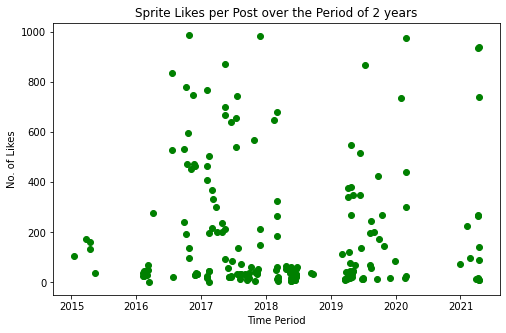

In [373]:
plt.figure(figsize=(8,5))
plt.scatter(data3.time,data3.likes, color='green',)
plt.title('Sprite Likes per Post over the Period of 2 years')
plt.xlabel('Time Period')
plt.ylabel('No. of Likes')
plt.show()

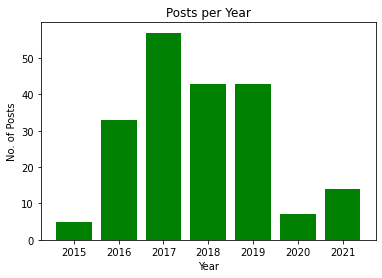

In [375]:
sprite_post_year = []
for i in data3.time.tolist():
    sprite_post_year.append(i.year)

sprite_year = {}
for i in np.unique(sprite_post_year):
    sprite_year[i] = sprite_post_year.count(i)

plt.bar(sprite_year.keys(), sprite_year.values(), color='green')
plt.title('Posts per Year')
plt.xlabel('Year')
plt.ylabel('No. of Posts')
plt.show()

In [224]:
# Extracting the comments from each post
sprite = data3.comments_full.tolist()
sprite = list(filter(None, sprite))

sprite_tmp = []
for i in range(len(sprite)):
    for j in range(len(sprite[i])):
        sprite_tmp.append(sprite[i][j])

In [226]:
# Putting the extracted comments into a DataFrame
sprite_commentors = pd.DataFrame(sprite_tmp, columns=sprite_tmp[0].keys())

In [227]:
# Using the cleaning function and Vader to find Sentiments for each comment
sia = SentimentIntensityAnalyzer()
sprite_commentors['cleaned_comments'] = sprite_commentors['comment_text'].apply(lambda x: clean_text(x))
sprite_commentors['Positive'] = sprite_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['pos']) 
sprite_commentors['Negative'] = sprite_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neg'])
sprite_commentors['Neutral'] = sprite_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['neu'])
sprite_commentors['Compound'] = sprite_commentors['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [300]:
# Dropping columns that are null
sprite_commentors = sprite_commentors.drop(['commenter_url', 'commenter_meta'], axis=1)

In [301]:
sprite_commentors

,comment_id,commenter_name,comment_text,comment_time,cleaned_comments,Positive,Negative,Neutral,Compound
0,3697949503654271,Kumar Roshan,My favourite,NaT,favourite,0.000,0.0,1.000,0.0000
1,2591890994260133,C P Yadav,Nice pic,2020-05-18 23:33:39.144701,nice pic,0.737,0.0,0.263,0.4215
2,2592307260885173,Harindar Kumar,Very nice,2020-05-18 23:33:39.147629,nice,1.000,0.0,0.000,0.4215
3,2591751464274086,Rajan Singh,Gajjjjjbbbbbb bhai Hero,2020-05-18 23:33:39.152534,gajjjjjbbbbbb bhai hero,0.643,0.0,0.357,0.5574
4,2592057520910147,Samad Mirza,Cincinnatus,2020-05-18 23:33:39.157389,cincinnatus,0.000,0.0,1.000,0.0000
...,...,...,...,...,...,...,...,...,...
582,1264258787023367,Manimegalai Udaiyakumaran,Manimegalai Udaiyakumaran,NaT,manimegalai udaiyakumaran,0.000,0.0,1.000,0.0000
583,957325161050066,Ŕømęø Mąđhąv,Madhav,NaT,madhav,0.000,0.0,1.000,0.0000
584,765166380265946,Rajan Jain,I win Samsung note4 in dring dring offeras per...,NaT,win samsung note dring dring offeras per winni...,0.340,0.0,0.660,0.8020
585,1246325002150079,Rajesh Kumar,Rajesh Kumar,NaT,rajesh kumar,0.000,0.0,1.000,0.0000


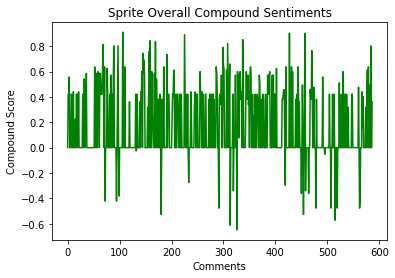

In [376]:
plt.plot(sprite_commentors.Compound, color='green')
plt.title('Sprite Overall Compound Sentiments')
plt.xlabel('Comments')
plt.ylabel('Compound Score')
plt.show()